In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.io import loadmat 
from scipy.ndimage import convolve1d
from scipy.signal import butter
from scipy.signal import sosfiltfilt
from scipy.signal import welch

from sklearn.model_selection import train_test_split

# 1) Load and Visualize Data


9 movements:

0. rest
1. thumb flexion/extension
2. thumb abduction/adduction
3. index finger flexion/extension
4. middle finger flexion/extension
5. combined ring and little fingers flexion/extension
6. index pointer
7. cylindrical grip
8. lateral grip
9. tripod grip


duration of each of the nine movements varied between 6 and 9 seconds and consecutive trials were interleaved with 3 seconds of rest

Each movement repetition lasted 5 seconds and was followed by 3 seconds of rest. The protocol includes 6 repetitions of 40 different movements (plus rest).

In [35]:
data = loadmat("S1_E1_A1.mat")
print("Dataset variables:")
for key in data.keys():
    if not key.startswith("__"):
        print(key)

emg_data = data["emg"]
repetition = data['repetition'].flatten()

Dataset variables:
subject
exercise
emg
acc
gyro
mag
glove
stimulus
repetition
restimulus
rerepetition


- Subject: subject number.
- Exercise: exercise number (value set to 1 in all data files).
- emg (16 columns): sEMG signal.
- acc (48 columns): three-axes accelerometers of the 16 sensors.
- gyro (48 columns): three-axes gyroscopes of the 16 sensors.
- mag (48 columns): three-axes magnetometers of the 16 sensors
- Glove (18 columns): calibrated signal from the sensors of the cyberglove.
The cyberglove signal corresponds to data from the cyberglove sensors located as shown in the following picture; "n/a" corresponds to not available sensors, since an 18-DOF model was used. Prior to each experiment, the data glove was calibrated to the specific subject using the "quick calibration" procedure provided by the manufacturer.
- Stimulus (1 column): the movement repeated by the subject, according to the displayed movie.
- Restimulus (1 column): the movement repeated by the subject, but with the duration of the movement label refined a-posteriori in order to better correspond to the real movement.
- Repetition (1 column): repetition of the stimulus.
- Rerepetition (1 column): repetition of restimulus.

In [36]:
print("Glove data shape: ", data['glove'].shape)
print("EMG data dimension: {}".format(emg_data.shape))
print("EMG data type: {}".format(type(emg_data)))

Glove data shape:  (2292526, 18)
EMG data dimension: (2292526, 16)
EMG data type: <class 'numpy.ndarray'>


# ?????? ADD ONLY PART OF EMG DATA INVOLVING MOVEMENT --> HOW?????
(pour data_index_where_movement_ends --> voir le dernier lab pour comprendre mais je trouve l'info nul part genre ni dans la documentation du dataset ni dans le paper et/ou sait pas comment la déduire)

In [37]:
# Take only the part of EMG data where fingers are involved in movements --> HOW???

# data_index_where_movement_ends = ???????? 
print("EMG data dimension: {}".format(emg_data.shape))
print("EMG data type: {}".format(type(emg_data)))

EMG data dimension: (2292526, 16)
EMG data type: <class 'numpy.ndarray'>


paper : "The columns of the design (i.e., feature) matrices were subsequently standardized via mean subtraction and inverse standard deviation scaling. Feature means and standard deviations were estimated using training data only."

Glove data dimension: (2292526, 5)
Glove data type: <class 'numpy.ndarray'>


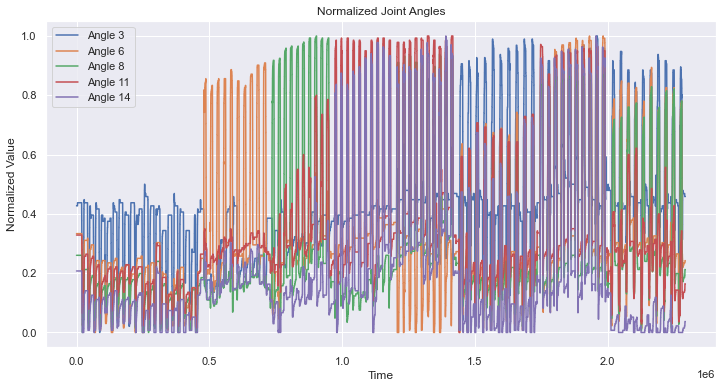

In [38]:
# only regressing on finger joints 3, 6, 8, 11, 14 (0-based indexing)
glove_data_index = data["glove"][:, [2, 5, 7, 10, 13]]
print("Glove data dimension: {}".format(glove_data_index.shape))
print("Glove data type: {}".format(type(glove_data_index)))

# # ???????????????????????????????????????? is it useful? should we do this?
# Normalize each angle (Min-Max scaling)
normalized_angles = (glove_data_index - np.min(glove_data_index, axis=0)) / (np.max(glove_data_index, axis=0) - np.min(glove_data_index, axis=0))

# Visualize the normalized joint angles
plt.figure(figsize=(12, 6))
for i, angle in enumerate(['Angle 3', 'Angle 6', 'Angle 8', 'Angle 11', 'Angle 14']):
    plt.plot(normalized_angles[:, i], label=angle)
plt.title('Normalized Joint Angles')
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()
# # ????????????????????????????????????????

# analysis????? idk

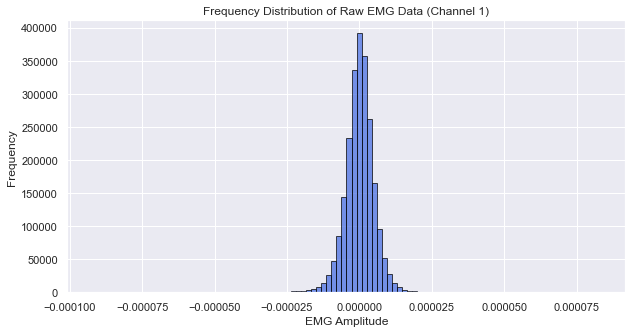

In [39]:
# Frequency distribution for joint angle 3

plt.figure(figsize=(10,5))
plt.hist(emg_data[:,2], bins=100, color='royalblue', alpha=0.7, edgecolor='black')
plt.title("Frequency Distribution of Raw EMG Data (Channel 1)")
plt.xlabel("EMG Amplitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Amplitude')

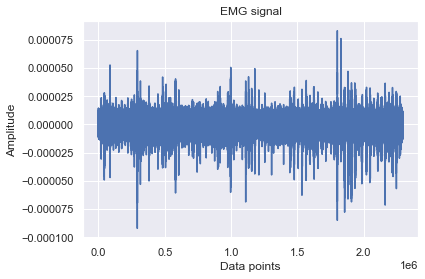

In [40]:
# Plot first channel to get a sense of the data
plt.close("all")
fig, ax = plt.subplots()
ax.plot(emg_data[:, 2])   
ax.set_title("EMG signal")
ax.set_xlabel("Data points")
ax.set_ylabel("Amplitude")

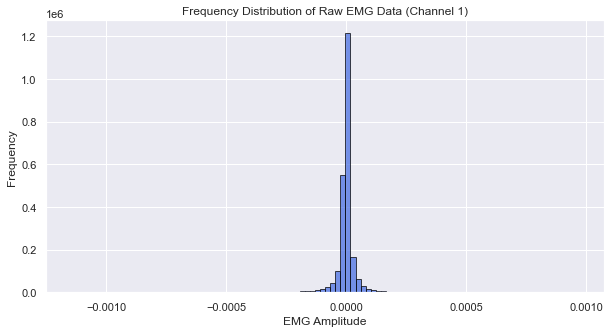

In [41]:
# Frequency distribution for joint angle 6

plt.figure(figsize=(10,5))
plt.hist(emg_data[:,5], bins=100, color='royalblue', alpha=0.7, edgecolor='black')
plt.title("Frequency Distribution of Raw EMG Data (Channel 1)")
plt.xlabel("EMG Amplitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Amplitude')

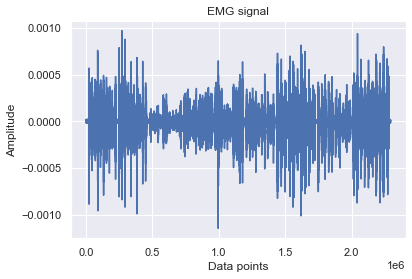

In [42]:
plt.close("all")
fig, ax = plt.subplots()
ax.plot(emg_data[:, 5])   
ax.set_title("EMG signal")
ax.set_xlabel("Data points")
ax.set_ylabel("Amplitude")

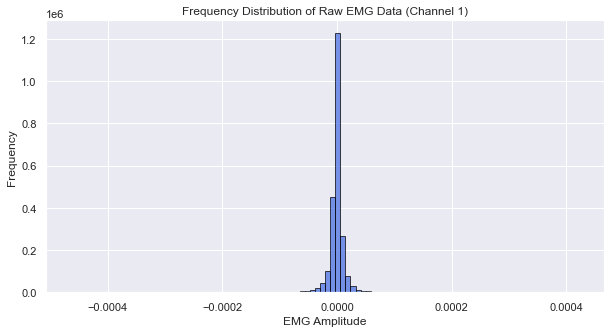

In [43]:
# Frequency distribution for joint angle 8

plt.figure(figsize=(10,5))
plt.hist(emg_data[:,7], bins=100, color='royalblue', alpha=0.7, edgecolor='black')
plt.title("Frequency Distribution of Raw EMG Data (Channel 1)")
plt.xlabel("EMG Amplitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Amplitude')

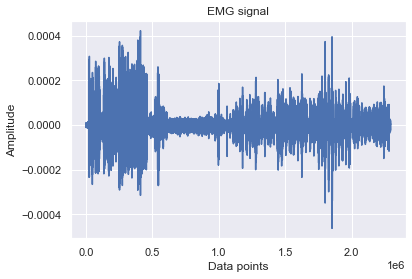

In [44]:
plt.close("all")
fig, ax = plt.subplots()
ax.plot(emg_data[:, 7])   
ax.set_title("EMG signal")
ax.set_xlabel("Data points")
ax.set_ylabel("Amplitude")

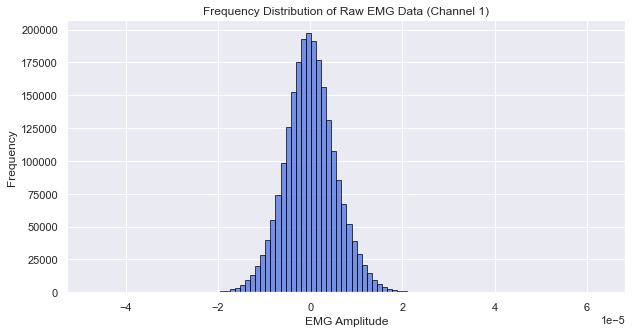

In [45]:
# Frequency distribution for joint angle 11

plt.figure(figsize=(10,5))
plt.hist(emg_data[:,10], bins=100, color='royalblue', alpha=0.7, edgecolor='black')
plt.title("Frequency Distribution of Raw EMG Data (Channel 1)")
plt.xlabel("EMG Amplitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Amplitude')

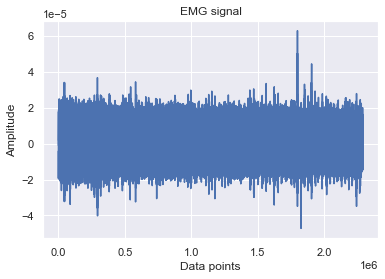

In [46]:
plt.close("all")
fig, ax = plt.subplots()
ax.plot(emg_data[:, 10])   
ax.set_title("EMG signal")
ax.set_xlabel("Data points")
ax.set_ylabel("Amplitude")

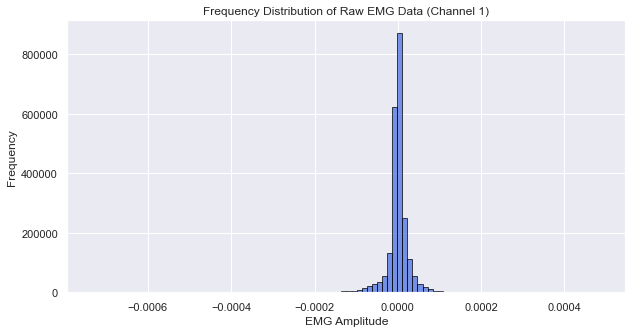

In [47]:
# Frequency distribution for joint angle 14

plt.figure(figsize=(10,5))
plt.hist(emg_data[:,13], bins=100, color='royalblue', alpha=0.7, edgecolor='black')
plt.title("Frequency Distribution of Raw EMG Data (Channel 1)")
plt.xlabel("EMG Amplitude")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Amplitude')

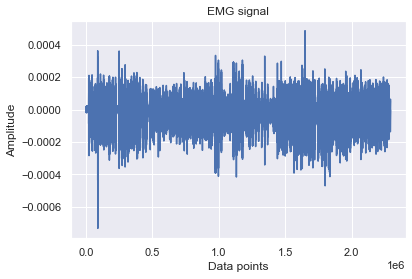

In [48]:
plt.close("all")
fig, ax = plt.subplots()
ax.plot(emg_data[:, 13])   
ax.set_title("EMG signal")
ax.set_xlabel("Data points")
ax.set_ylabel("Amplitude")

paper : Krasoulis et al., Effect of user adaptation on prosthetic finger control with an intuitive myoelectric decoder. Frontiers in Neuroscience, 2019

WINDOW LENGTH & STEP: "The length of the window was set to 128 ms with an increment of 50 ms (60% overlap)" -paper

Text(0.5, 1.0, 'Power Spectral Density plot in Log scale')

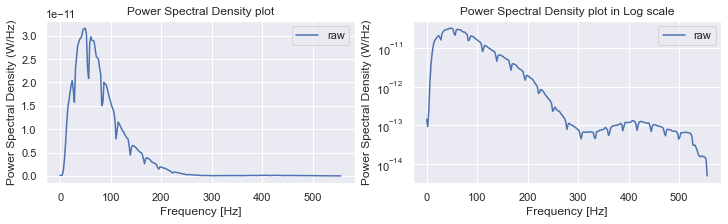

In [49]:
# Use Welch's method for power spectral density estimation, it reduces the variance of the estimate --> check the signal quality to decide on the signal processing techniques
fs = 1111  # [Hz], from paper describing the signal acquisition
emg_window_length_sec = 128e-3  # [s] = 128 ms window (paper)
incremental_window_length_sec = 50e-3  # [s] = 50 ms step (paper)

freqs_pre, Pxx_pre = welch(emg_data[:, 8], fs=fs, nperseg=512)

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 3))
ax[0].plot(freqs_pre, Pxx_pre, label="raw")
ax[0].legend()
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_ylabel("Power Spectral Density (W/Hz)")
ax[0].set_title("Power Spectral Density plot")

ax[1].semilogy(freqs_pre, Pxx_pre, label="raw")
ax[1].legend()
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylabel("Power Spectral Density (W/Hz)")
ax[1].set_title("Power Spectral Density plot in Log scale")

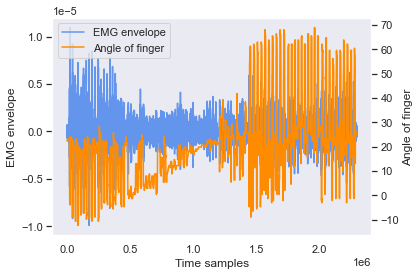

In [50]:
# Enveloping with moving average

mov_mean_size = 400
mov_mean_weights = np.ones(mov_mean_size) / mov_mean_size
EMG_envelopes = convolve1d(emg_data, weights=mov_mean_weights, axis=0)

fig, ax = plt.subplots()
ax.plot(EMG_envelopes[:, 0],color = 'cornflowerblue', label="EMG envelope")
ax.set_ylabel("EMG envelope")
ax.set_xlabel("Time samples")
ax.grid(False)

finger_angle_ax = ax.twinx()
finger_angle_ax.plot(glove_data_index[:, 0], color="darkorange", label="Angle of finger")
finger_angle_ax.set_ylabel("Angle of finger")
finger_angle_ax.grid(False)

# Get handles and labels for legend
emg_handles, emg_labels = ax.get_legend_handles_labels()
finger_angle_handles, finger_angle_labels = finger_angle_ax.get_legend_handles_labels()

# Combine handles and labels
combined_handles = emg_handles + finger_angle_handles
combined_labels = emg_labels + finger_angle_labels

# Create a single legend
ax.legend(combined_handles, combined_labels, loc='upper left')
plt.tight_layout()

"The sampling frequency of EMG signals was set to 1,111 Hz." - paper

In [51]:
# Use repetitions 1-4 and 7-10 for training, and 5-6 for testing.
train_reps = [1,2,3,4,7,8,9,10]
test_reps = [5,6]

train_mask = np.isin(repetition, train_reps)
test_mask = np.isin(repetition, test_reps)

EMG_train = EMG_envelopes[train_mask,:]
Labels_train = glove_data_index[train_mask,:]

EMG_test = EMG_envelopes[test_mask,:]
Labels_test = glove_data_index[test_mask,:]

print("EMG train shape:", EMG_train.shape)
print("Labels train shape:", Labels_train.shape)
print("EMG test shape:", EMG_test.shape)
print("Labels test shape:", Labels_test.shape)


EMG train shape: (1195718, 16)
Labels train shape: (1195718, 5)
EMG test shape: (300313, 16)
Labels test shape: (300313, 5)


# 2) Sliding Windows

In [52]:
def extract_time_windows_regression(EMG: np.ndarray, Label: np.ndarray, fs: int, win_len: float, step: float):
    n,m = EMG.shape
    win_len_samples = int(win_len*fs)
    step_samples = int(step*fs)
    start_points = np.arange(0, n - win_len_samples, step_samples)
    end_points = start_points + win_len_samples

    EMG_windows = np.zeros((len(start_points), win_len_samples, m))
    Labels_windows = np.zeros((len(start_points), win_len_samples, Label.shape[1]))
    for i in range(len(start_points)):
        EMG_windows[i,:,:] = EMG[start_points[i]:end_points[i],:]
        Labels_windows[i,:,:] = Label[start_points[i]:end_points[i],:]
    return EMG_windows, Labels_windows

EMG_windows, Labels_windows = extract_time_windows_regression(EMG_envelopes, glove_data_index, fs, emg_window_length_sec, incremental_window_length_sec)


In [55]:
# Split data into train/test
EMG_train_windows, EMG_test_windows, Labels_train_windows, Labels_test_windows = train_test_split(EMG_windows, Labels_windows, test_size=0.2, random_state=151)

print(f"EMG train data shape: {EMG_train_windows.shape}, Train label shape: {Labels_train_windows.shape}")
print(f"EMG test data shape: {EMG_test_windows.shape}, Test label shape: {Labels_test_windows.shape}")

EMG train data shape: (33344, 142, 16), Train label shape: (33344, 142, 5)
EMG test data shape: (8336, 142, 16), Test label shape: (8336, 142, 5)


# 3) Extracting features

In [56]:
def extract_features(EMG_windows: np.ndarray, Labels_windows: np.ndarray):
    """
    Extract mean, std and max amplitude from each window.
    EMG_windows: (n_windows, win_len, n_channels)
    Labels_windows: (n_windows, win_len, n_fingers)
    """
    # Mean across time axis (axis=1)
    EMG_mean = np.mean(EMG_windows, axis=1)  # shape (n_windows, n_channels)
    EMG_std = np.std(EMG_windows, axis=1)    # shape (n_windows, n_channels)
    EMG_max_amplitude = np.max(np.abs(EMG_windows), axis=1)  # (n_windows, n_channels)
    
    Labels_mean = np.mean(Labels_windows, axis=1) # (n_windows, n_fingers)
    
    # Concatenate features along channels: (n_windows, 3*n_channels)
    EMG_extracted_features = np.concatenate((EMG_mean, EMG_std, EMG_max_amplitude), axis=1)
    return EMG_extracted_features, Labels_mean

EMG_train_extracted_features, Labels_train_mean = extract_features(EMG_train_windows,Labels_train_windows)
EMG_test_extracted_features, Labels_test_mean = extract_features(EMG_test_windows,Labels_test_windows)

print("EMG train extracted features shape: {}, Finger labels feature shape:{}".format(EMG_train_extracted_features.shape, Labels_train_mean.shape))
print("EMG test extracted features shape: {}, Finger labels feature shape:{}".format(EMG_test_extracted_features.shape, Labels_test_mean.shape))


EMG train extracted features shape: (33344, 48), Finger labels feature shape:(33344, 5)
EMG test extracted features shape: (8336, 48), Finger labels feature shape:(8336, 5)


# 4) Regression on the kinematics

MSE of Gradient Boosting (MultiOutput) Regressor: 988.2083633241688


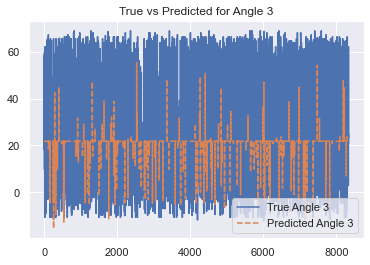

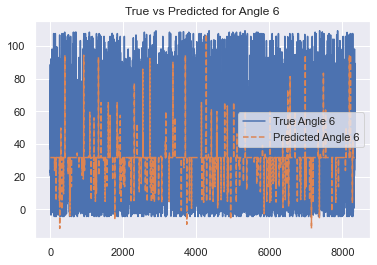

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

multi_reg = MultiOutputRegressor(GradientBoostingRegressor())
multi_reg.fit(EMG_train_extracted_features, Labels_train_mean)

y_pred = multi_reg.predict(EMG_test_extracted_features)

# Compute the mean squared error across all outputs
MSE = mean_squared_error(Labels_test_mean, y_pred)
print(f'MSE of Gradient Boosting (MultiOutput) Regressor: {MSE}')

# Plot the true and predicted values for the first two angles (angle 3 and angle 6)
# Assuming angle 3 is index 0 and angle 6 is index 1 in Labels_test_mean
fig, ax = plt.subplots()
ax.plot(Labels_test_mean[:,0], label="True Angle 3")
ax.plot(y_pred[:,0], linestyle="--", label="Predicted Angle 3")
ax.legend()
ax.set_title("True vs Predicted for Angle 3")

fig, ax = plt.subplots()
ax.plot(Labels_test_mean[:,1], label="True Angle 6")
ax.plot(y_pred[:,1], linestyle="--", label="Predicted Angle 6")
ax.legend()
ax.set_title("True vs Predicted for Angle 6")

plt.show()

# graph illisibles mdr (ou alors j'ai rien capté)

MSE of Gradient Boosting (MultiOutput) Regressor: 988.2083633241688

"We performed three types of model selection (i.e., hyper-parameter tuning) for each participant during the training phase: sensor selection, regularization, and smoothing parameter optimization." -paper

"Offline reconstruction accuracy was assessed using the multivariate (R2MV) metric" -paper

# optional i think (not mentioned in the instructions): cross-validation

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.01, 0.1, 0.05],
    'estimator__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(MultiOutputRegressor(GradientBoostingRegressor()), param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(EMG_train_extracted_features, Labels_train_mean)
print("Best Parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_


/Users/romy/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/romy/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/romy/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/romy/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"

Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 7, 'estimator__n_estimators': 200}
Best score (MSE): 985.1995783477408


Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 7, 'estimator__n_estimators': 200}
Best score (MSE): 985.1995783477408

--> moins bon que MSE de base!!!!!!